<a href="https://colab.research.google.com/github/GeraldineVazquez/EDP-2-/blob/main/MetocodeGalerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Galerkin**

Este es un tipo de método de residuos pesados, donde las funciones de peso

coinciden con las funciones base $\\β_i$




In [1]:
import sympy as sp #Se usa para cálculos simbólicos
import numpy as np # Se usa para manejo de arreglos numéricos.

import matplotlib.pyplot as plt
from scipy.integrate import quad #Se usa para calcular las integrales de galerkin
import pandas as pd # para hacer la tablita

# Método de Galerkin – Ejercicio 5.12

Queremos resolver el problema de contorno:

$$
-\frac{d^2 u}{dx^2} + u(x) = x
$$

con condiciones de frontera:

$$
u(0) = u(1) = 0
$$

Primero obtenemos la **solución analítica exacta** (para poder comparar después).

Luego aplicaremos el **método de Galerkin** usando exactamente **3 funciones base**:

$$
\phi_i(x) = \sin(i\pi x), \quad i = 1,2,3
$$

y buscaremos la aproximación:

$$
u_3(x) = \alpha_1 \sin(\pi x) + \alpha_2 \sin(2\pi x) + \alpha_3 \sin(3\pi x)
$$

Así analiticamente:

In [2]:
# Definimos la variable simbólica y la función desconocida
x = sp.symbols('x') # introducimos una variable
u = sp.Function('u') # esto es una función

In [3]:
ode = -u(x).diff(x, 2) + u(x) - x
sp.dsolve(ode, u(x))  #Esta es la solución general (sin condiciones)

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

In [4]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})  #agragmos las condiciones
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

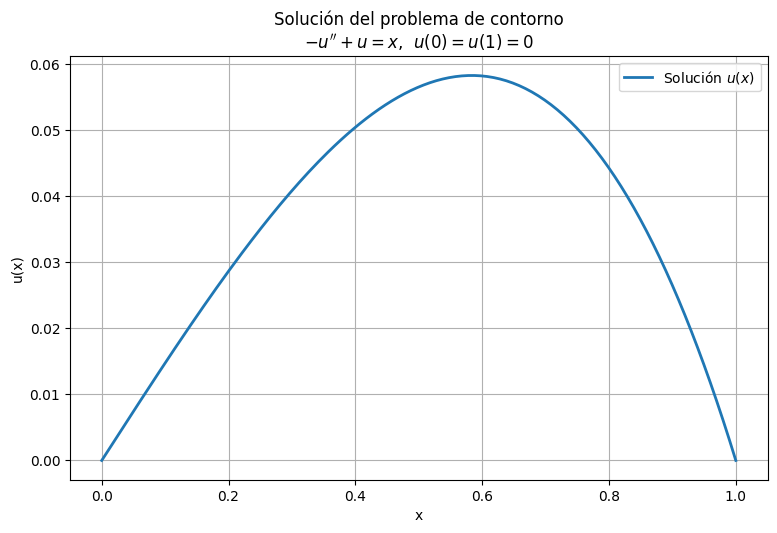

In [5]:
# Convertimos en un arreglo de numpy es decir comvertimos la solución exacta
# a función numerica para graficar
u_expr = sol.rhs

u_num = sp.lambdify(x, u_expr, "numpy")

# Graficamos la solución exacta
xx = np.linspace(0, 1, 200)
yy = u_num(xx)

plt.figure(figsize=(9,5.5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$-u'' + u = x$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

 **Método de Galerkin** con n=3 ya que $$n_3=∑_{i=1}^3 α_iβ_i(x) $$  con $$𝚽_1(x)=\sin(iπx)$$

In [6]:
x = sp.symbols('x')
α1, α2 , α3 = sp.symbols('α1 α2 α3')  #Proponemos la función de prueba

u3 = α1*sp.sin(sp.pi*x) + α2*sp.sin(2*sp.pi*x) + α3*sp.sin(3*sp.pi*x)

In [7]:
u3

α1*sin(pi*x) + α2*sin(2*pi*x) + α3*sin(3*pi*x)

Definimos el residuo (error) E


In [8]:
u3_pp = sp.diff(u3, x, 2)

E = -u3_pp + u3 - x

In [9]:
E

-x + α1*sin(pi*x) + α2*sin(2*pi*x) + α3*sin(3*pi*x) + pi**2*(α1*sin(pi*x) + 4*α2*sin(2*pi*x) + 9*α3*sin(3*pi*x))

In [10]:
E.simplify()

-x + α1*sin(pi*x) + α2*sin(2*pi*x) + α3*sin(3*pi*x) + pi**2*(α1*sin(pi*x) + 4*α2*sin(2*pi*x) + 9*α3*sin(3*pi*x))

### Imposición de ortogonalidad del residuo (método de Galerkin)

Para determinar los coeficientes $\alpha_1$, $\alpha_2$ y $\alpha_3$ hacemos que el residuo $E(x)$ sea ortogonal a cada una de las funciones base:

$$
\begin{aligned}
\int_0^1 E(x) \, \sin(\pi x) \, dx &= 0 \\[6pt]
\int_0^1 E(x) \, \sin(2\pi x) \, dx &= 0 \\[6pt]
\int_0^1 E(x) \, \sin(3\pi x) \, dx &= 0
\end{aligned}
$$

Estas tres ecuaciones conforman el sistema lineal $3\times 3$ que resolvemos para obtener los valores de $\alpha_1$, $\alpha_2$ y $\alpha_3$.

In [11]:
I_1 = sp.integrate(E * sp.sin(sp.pi*x), (x, 0, 1))
I_2 = sp.integrate(E * sp.sin(2*sp.pi*x), (x, 0, 1))
I_3 = sp.integrate(E * sp.sin(3*sp.pi*x), (x, 0, 1))

In [12]:
I_1

α1/2 + pi**2*α1/2 - 1/pi

In [13]:
I_2

α2/2 + 2*pi**2*α2 + 1/(2*pi)

In [14]:
I_3

α3/2 + 9*pi**2*α3/2 - 1/(3*pi)

In [15]:
soleq = sp.solve([I_1, I_2, I_3], [α1, α2 , α3],  simplify=True) # resuelve el sistema 3x3 que se formo
# para poder econcontrar [α1, α2 , α3]
soleq

{α1: 2/(pi + pi**3), α2: -1/(pi + 4*pi**3), α3: 2/(3*pi + 27*pi**3)}

In [16]:
u_approx = u3.subs(soleq)

In [17]:
u_approx

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [18]:
u_approx.simplify()

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [19]:
# convertimos a flotante
u_approx_num = u_approx.subs(soleq).evalf()
u_approx_fn = sp.lambdify(x, u_approx_num, "numpy")

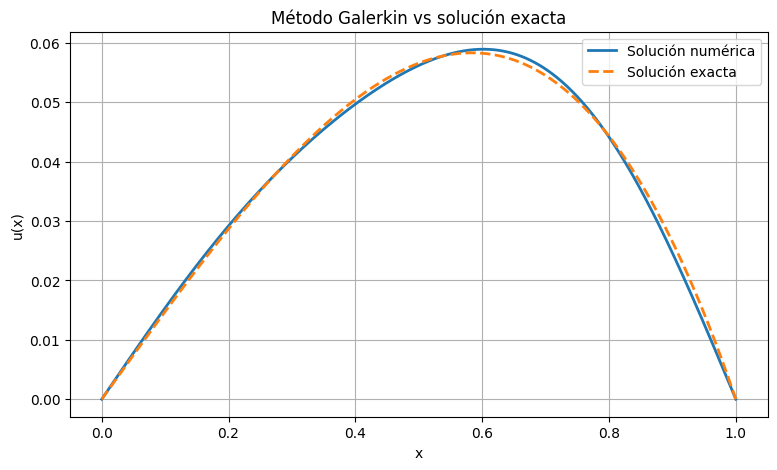


TABLA DE VALORES Y ERRORES


,x,u_exacta(x),u_Galerkin(x),|error|
0,0.0,0.00000000,0.00000000,0.00e+00
1,0.1,0.01476630,0.01538782,6.22e-04
2,0.2,0.02867955,0.02919385,5.14e-04
3,0.3,0.04087816,0.04063437,2.44e-04
4,0.4,0.05048340,0.04969150,7.92e-04
5,0.5,0.05659056,0.05620640,3.84e-04
6,0.6,0.05825993,0.05893582,6.76e-04
7,0.7,0.05450738,0.05559200,1.08e-03
8,0.8,0.04429452,0.04415148,1.43e-04
9,0.9,0.02651831,0.02463215,1.89e-03


SOLUCIÓN EXACTA




Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))



SOLUCIÓN POR EL METODO DE GALERKIN




2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

ERRORES GLOBALES


Error máximo = 1.983e-03
Error L²     = 8.442e-04


Valores de α₁,α₂,α₃

α₁ = 0.0585688079
α₂ = -0.0078636939
α₃ = 0.0023624068


In [20]:
# Solución analítica y numérica
xx = np.linspace(0, 1, 1000)
yy = u_num(xx)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

plt.title("Método Galerkin vs solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()


# ==================== TABLA DE ERRORES ====================
x_tabla = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
u_exacta_tabla   = u_num(x_tabla)
u_galerkin_tabla = u_approx_fn(x_tabla)
error_abs = np.abs(u_exacta_tabla - u_galerkin_tabla)

datos = pd.DataFrame({
    'x'              : x_tabla,
    'u_exacta(x)'    : np.round(u_exacta_tabla, 8),
    'u_Galerkin(x)'  : np.round(u_galerkin_tabla, 8),
    '|error|'         : error_abs
})

print("\nTABLA DE VALORES Y ERRORES")
print("="*80)
display(datos.style.format({
    'x'              : '{:.1f}',
    'u_exacta(x)'    : '{:.8f}',
    'u_Galerkin(x)'  : '{:.8f}',
    '|error|'         : '{:.2e}'
}).set_properties(**{'text-align': 'center'}))
print("="*80)

# ERRORES FINALES
error_max = np.max(np.abs(yy - u_approx_fn(xx)))
error_L2  = np.sqrt(np.trapezoid((yy - u_approx_fn(xx))**2, xx))


print("SOLUCIÓN EXACTA")
print('\n')
display(sol)
print('\n')
print("="*80)
print("SOLUCIÓN POR EL METODO DE GALERKIN")
print('\n')
display(u_approx)
print("="*80)

print("ERRORES GLOBALES")
print('\n')
print(f"Error máximo = {error_max:.3e}")
print(f"Error L²     = {error_L2:.3e}")
print('\n')
print("Valores de α₁,α₂,α₃")
print(f"\nα₁ = {float(soleq[α1]):.10f}")
print(f"α₂ = {float(soleq[α2]):.10f}")
print(f"α₃ = {float(soleq[α3]):.10f}")


### Procedimiento del Método de Galerkin – Ejercicio 5.12

Para resolver el problema de contorno
$$
-u''(x) + u(x) = x, \quad x \in (0,1), \quad u(0) = u(1) = 0
$$
mediante el **método de Galerkin** con exactamente **3 funciones base**, seguimos los siguientes pasos:

1. **Elección de las funciones base**  
   Se toman las primeras tres funciones propias del problema que satisfacen las condiciones de contorno:
   $$
   \phi_1(x) = \sin(\pi x),\quad \phi_2(x) = \sin(2\pi x),\quad \phi_3(x) = \sin(3\pi x)
   $$

2. **Función de prueba (solución aproximada)**
   $$
   u_3(x) = \alpha_1 \sin(\pi x) + \alpha_2 \sin(2\pi x) + \alpha_3 \sin(3\pi x)
   $$

3. **Residuo**
   Sustituyendo $u_3(x)$ en la ecuación diferencial se obtiene el residuo:
   $$
   E(x) = -u_3''(x) + u_3(x) - x
   $$

4. **Condición de ortogonalidad**  
   El residuo debe ser ortogonal a cada función base:
   $$
   \int_0^1 E(x) \sin(k\pi x)\, dx = 0 \quad \text{para } k = 1,2,3
   $$

5. **Sistema lineal resultante**  
   Al desarrollar las integrales anteriores se obtiene el sistema 3×3:
   $$
   \begin{cases}
   \frac{\alpha_1}{2} + \frac{\pi^2\alpha_1}{2} - \frac{1}{\pi} = 0 \\[8pt]
   \frac{\alpha_2}{2} + 2\pi^2\alpha_2 + \frac{1}{2\pi} = 0 \\[8pt]
   \frac{\alpha_3}{2} + \frac{9\pi^2\alpha_3}{2} - \frac{1}{3\pi} = 0
   \end{cases}
   $$

6. **Resolución del sistema**  
   Resolviendo el sistema se obtienen los coeficientes:
   $$
   \alpha_1 = \dfrac{2}{\pi + \pi^3},\quad \alpha_2 = -\dfrac{1}{\pi + 4\pi^3},\quad \alpha_3 = \dfrac{2}{3\pi + 27\pi^3}
   $$
   cuyos valores numéricos son:
   $$
   \alpha_1 \approx 0.05857,\quad \alpha_2 \approx -0.00786,\quad \alpha_3 \approx 0.00236
   $$

7. **Solución aproximada final**
   $$
   u_3(x) \approx 0.05857 \sin(\pi x) - 0.00786 \sin(2\pi x) + 0.00236 \sin(3\pi x)
   $$

8. **Errores**
   - Error máximo: $\|u - u_3\|_\infty \approx 1.98 \times 10^{-3}$
   - Error $L^2$: $\|u - u_3\|_{L^2} \approx 8.44 \times 10^{-4}$

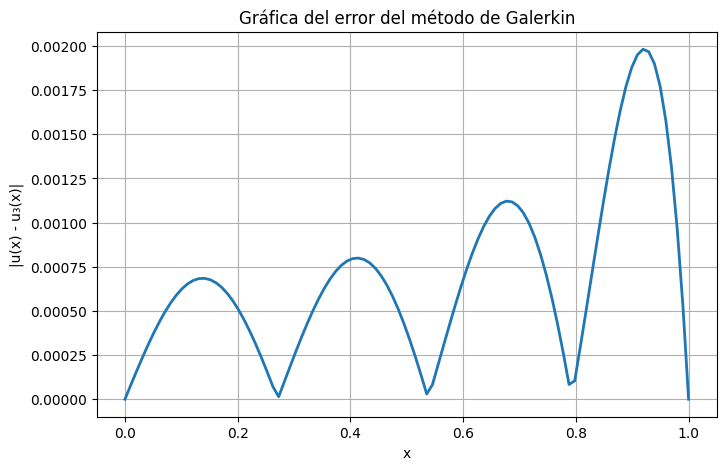

In [26]:
x = np.linspace(0,1,100)

error = np.abs(u_num(x) - u_approx_fn(x))

plt.figure(figsize=(8,5))
plt.plot(x, error, linewidth=2)
plt.xlabel("x")
plt.ylabel("|u(x) - u₃(x)|")
plt.title("Gráfica del error del método de Galerkin")
plt.grid(True)
plt.show()

## Explicación del error
El error aparece porque estamos aproximando la solución exacta usando solo tres funciones base del tipo:

$$
\sin(k\pi x)
$$

En el método de Galerkin, al usar pocas funciones:

- La aproximación captura la forma general de la solución.
- Pero no puede reproducir todos los detalles de la solución exacta, especialmente su curvatura cúbica.

### Comportamiento del error

- El error es máximo cerca de los puntos donde la curvatura de la solución exacta cambia más rápido.
- El error tiende a cero en los extremos porque tanto la solución exacta como la aproximación cumplen las condiciones de frontera:

$$
u(0) = u(1) = 0
$$



Si se agregan más funciones base como:

$$
\sin(4\pi x),\quad \sin(5\pi x),\quad \dots
$$

el error disminuirá porque la aproximación podrá capturar más detalles de la solución exacta.

### Error obtenido

El valor reportado del error máximo es:

$$
\|u - u_3\|_{\infty} \approx 1.98 \times 10^{-3}
$$

lo cual es completamente consistente con usar solo tres modos sinusoidales en el método de Galerkin.
